# Final Project: E-commerce
### Part 2
by: ***Dorothy Kunth***

## Table of Contents

- [Project Overview](#overview)
- [Customer Segmentation using RFM](#cust_rfm)
- [Product Segmentation using RFM](#prod_rfm)
- [Product Category Identification](#prod_cat)
- [Product Category Analysis](#prod_range)
- [Statistical Hypotheses](#hypothesis)
- [Conclusion](#conclusion)

<a id='overview'></a>
## Project Overview
The dataset that will be used in this E-commerce Product Range Analysis is a sales transactions history of an online store that sells household goods. For e-commerce companies, performing analyses such as product range analysis, customer RFM, sales analysis play a very important role in order to ensure continued success of the business. 


### Project Goals
- 1. Identify the top performing products and product assortment, ranges or categories<br>
- 2. Identify the top performing customers


### Datasets and Attributes

The dataset contains ***541909*** transaction records from ***2018-11-29 to 2019-12-07***. It has 7 attributes:

**InvoiceNo**: Invoice reference number uniquely assigned for each transaction. If the InvoiceNo starts with 'C', it indicates a cancellation<br><br>
**StockCode**: Product or item code uniquely assigned to each distinct product<br><br>
**Description**: Product or item name<br><br>
**Quantity**: The quantities for each product or item per transaction<br><br>
**InvoiceDate**: Invoice date and time, the day and time the transaction was generated by the system<br><br>
**UnitPrice**: Product price per unit<br><br>
**CustomerID**: Customer reference number uniquely assigned to each customer<br><br>


### Project Scope
- 1. Data Preprocessing (Part 1)<br> 
- 2. Exploratory Data Analysis (Part 1)<br> 
- 3. Customer Segmentation using RFM (Part 2)<br>
- 4. Product Analysis (Part 2)
     - Product Segmentation  using RFM
     - Prudct Category Identification
     - Product Category Analysis<br>
- 5. Statistical Hypotheses (Part 2)<br>

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# reload and read the cleaned data ecom_final.csv
ecom_df = pd.read_csv('ecom_final.csv', parse_dates=['InvoiceDate'])
ecom_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29,2.55,17850.0,15.30,11,3,Thursday,8,2018-11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29,3.39,17850.0,20.34,11,3,Thursday,8,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29,2.75,17850.0,22.00,11,3,Thursday,8,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29,3.39,17850.0,20.34,11,3,Thursday,8,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29,3.39,17850.0,20.34,11,3,Thursday,8,2018-11


In [3]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532328 entries, 0 to 532327
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           532328 non-null  object        
 1   StockCode           532328 non-null  object        
 2   Description         532328 non-null  object        
 3   Quantity            532328 non-null  int64         
 4   InvoiceDate         532328 non-null  datetime64[ns]
 5   UnitPrice           532328 non-null  float64       
 6   CustomerID          400742 non-null  float64       
 7   TotalSales          532328 non-null  float64       
 8   TransactionMonth    532328 non-null  int64         
 9   TransactionDay      532328 non-null  int64         
 10  TransactionWeekday  532328 non-null  object        
 11  TransactionHour     532328 non-null  int64         
 12  TransactionPeriod   532328 non-null  object        
dtypes: datetime64[ns](1), float64

In [4]:
# change datatype of CustomerID from float to object
ecom_df['CustomerID'] = ecom_df['CustomerID'].fillna(0).astype('int64').astype('str')
ecom_df['CustomerID'].replace('0', np.nan, inplace = True)

In [5]:
# extract date from InvoiceDate
ecom_df['InvoiceDate'] = pd.to_datetime(ecom_df['InvoiceDate']).dt.date

In [6]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532328 entries, 0 to 532327
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           532328 non-null  object 
 1   StockCode           532328 non-null  object 
 2   Description         532328 non-null  object 
 3   Quantity            532328 non-null  int64  
 4   InvoiceDate         532328 non-null  object 
 5   UnitPrice           532328 non-null  float64
 6   CustomerID          400742 non-null  object 
 7   TotalSales          532328 non-null  float64
 8   TransactionMonth    532328 non-null  int64  
 9   TransactionDay      532328 non-null  int64  
 10  TransactionWeekday  532328 non-null  object 
 11  TransactionHour     532328 non-null  int64  
 12  TransactionPeriod   532328 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 52.8+ MB


<a id='cust_rfm'></a>
## Customer Segmentation using RFM
To perform customer segmentation using RFM, we will have to calculate customer behavior metrics:
1. *Recency* - measures how recent was each customer's last purchase
2. *Frequency* - measures how many purchases the customer has made over a given period
3. *Monetary Value* - measures how much has the customer spent over a given period

These values will be used to assign customers to RFM segments.

In [7]:
# create df for customer rfm
rfm_df = ecom_df.copy()
rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29,2.55,17850,15.30,11,3,Thursday,8,2018-11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29,2.75,17850,22.00,11,3,Thursday,8,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11


In [8]:
rfm_df['CustomerID'].isnull().sum()

131586

In [9]:
# drop records where CustomerID is null
rfm_df = rfm_df.dropna(subset=['CustomerID'])
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400742 entries, 0 to 532327
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           400742 non-null  object 
 1   StockCode           400742 non-null  object 
 2   Description         400742 non-null  object 
 3   Quantity            400742 non-null  int64  
 4   InvoiceDate         400742 non-null  object 
 5   UnitPrice           400742 non-null  float64
 6   CustomerID          400742 non-null  object 
 7   TotalSales          400742 non-null  float64
 8   TransactionMonth    400742 non-null  int64  
 9   TransactionDay      400742 non-null  int64  
 10  TransactionWeekday  400742 non-null  object 
 11  TransactionHour     400742 non-null  int64  
 12  TransactionPeriod   400742 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 42.8+ MB


In [10]:
# check the start and end date of the transactions
print('Transactions timeframe from {} to {}'.format(rfm_df['InvoiceDate'].min(), rfm_df['InvoiceDate'].max()))

Transactions timeframe from 2018-11-29 to 2019-12-07


In [11]:
# create hypothetical snapshot_day since the data comes from 2018 and 2019
snapshot_date = rfm_df['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2019-12-08


#### Calculate RFM Metrics

In [12]:
# aggregate data on a customer level
rfm = rfm_df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'})

In [13]:
# rename columns 
rfm.rename(columns = {'InvoiceDate': 'Recency',
                     'InvoiceNo': 'Frequency',
                     'TotalSales': 'MonetaryValue'}, inplace=True)

In [14]:
# check the first rows of data
print(rfm.head())
print('There are {:,} records of customers grouped by recency, frequency and monetary value'.format(rfm.shape[0]))

            Recency  Frequency  MonetaryValue
CustomerID                                   
12347             3        182        4310.00
12348            76         27        1437.24
12349            19         72        1457.55
12350           311         16         294.40
12352            37         84        1265.41
There are 4,349 records of customers grouped by recency, frequency and monetary value


In [15]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4349.000000,4349.000000,4349.000000
mean,93.053346,92.145781,1906.092739
std,101.186937,230.031188,8278.310604
min,1.000000,1.000000,-1192.200000
25%,18.000000,17.000000,296.700000
50%,51.000000,41.000000,650.410000
75%,144.000000,100.000000,1601.860000
max,374.000000,7937.000000,278742.020000


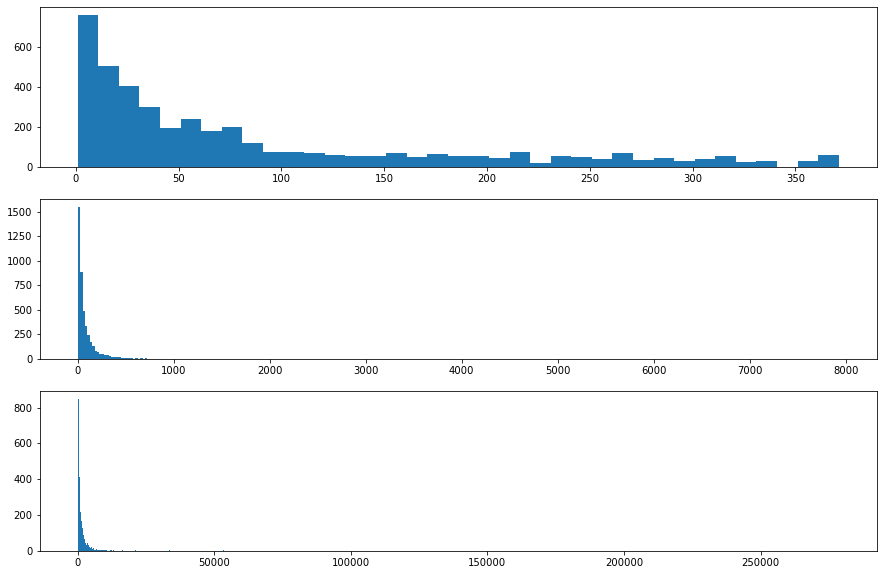

In [16]:
# plot RFM distributions
plt.figure(figsize=[15,10])

#plot distribution of recency
bins = np.arange(1, rfm['Recency'].max(), 10)
plt.subplot(3, 1, 1)
plt.hist(data=rfm, x = 'Recency', bins=bins)

#plot distribution of frequency
bins1 = np.arange(1, rfm['Frequency'].max(), 25)
plt.subplot(3, 1, 2)
plt.hist(data=rfm, x = 'Frequency', bins=bins1)

#plot distribution of monetary value
bins2 = np.arange(1, rfm['MonetaryValue'].max(), 200)
plt.subplot(3, 1, 3)
plt.hist(data=rfm, x = 'MonetaryValue',bins=bins2)

plt.show();

> The distribution of Recency, Frequency and Monetary Value metrics are all right skewed.

In [17]:
# calculate recency quartiles
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(rfm['Recency'], 4, labels = r_labels)
rfm = rfm.assign(R = r_quartiles.values)

# calculate frequency quartiles
f_labels = range(1, 5)
f_quartiles = pd.qcut(rfm['Frequency'], 4, labels = f_labels)
rfm = rfm.assign(F = f_quartiles.values)

# calculate monetary value quartiles
m_labels = range(1, 5)
m_quartiles = pd.qcut(rfm['MonetaryValue'], 4, labels = m_labels)
rfm = rfm.assign(M = m_quartiles.values)

rfm.sample(20)

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
18191,262,7,207.80,1,1,1
15107,312,14,260.00,1,1,1
13531,206,22,483.80,1,2,2
17015,29,217,1842.56,3,4,4
12881,276,7,298.00,1,1,2
14205,17,32,228.50,4,2,1
14698,2,210,1250.76,4,4,3
17850,303,310,5288.63,1,4,4
16185,17,31,529.41,4,2,2


In [18]:
# build RFM segment and RFM score

#concatenate RFM quartile values to RFM_Segment
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

#sum RFM quartile values to RFM_Score
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347,3,182,4310.00,4,4,4,4.04.04.0,12
12348,76,27,1437.24,2,2,3,2.02.03.0,7
12349,19,72,1457.55,3,3,3,3.03.03.0,9
12350,311,16,294.40,1,1,1,1.01.01.0,3
12352,37,84,1265.41,3,3,3,3.03.03.0,9
...,...,...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1,1.01.01.0,3
18281,181,7,80.82,1,1,1,1.01.01.0,3
18282,8,13,176.60,4,1,1,4.01.01.0,6


In [19]:
# count the number of unique segments
rfm['RFM_Segment'].nunique()

61

In [20]:
# get the 10 largest RFM segments
rfm['RFM_Segment'].value_counts()[:10]

4.04.04.0    468
1.01.01.0    402
3.04.04.0    208
1.02.02.0    201
2.01.01.0    181
3.03.03.0    170
4.03.03.0    165
2.03.03.0    162
2.02.02.0    159
3.02.02.0    122
Name: RFM_Segment, dtype: int64

In [21]:
# get the sizes of RFM scores
rfm['RFM_Score'].value_counts()

5     501
12    468
8     464
6     464
10    447
7     442
3     402
9     399
4     383
11    379
Name: RFM_Score, dtype: int64

In [22]:
# calculate summary metrics per RFM score
rfm.groupby(['RFM_Score']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           266.6       8.0         135.1   402
4           173.6      13.6         231.8   383
5           154.1      20.8         351.4   501
6            96.4      28.1         585.3   464
7            81.4      39.3         711.7   442
8            62.1      55.4         950.3   464
9            47.1      78.8        1364.1   399
10           31.5     113.1        1859.0   447
11           21.2     187.4        3810.7   379
12            7.3     369.2        8811.8   468

In [23]:
# use RFM score to group customers into named segments
def segment_customers(df):
    """pass a dataframe and return different named segments based on RFM scores"""
    if df['RFM_Score'] >= 11:
        return 'Top Customers'
    elif (df['RFM_Score'] >= 9) and (df['RFM_Score'] < 11):
        return 'Active Customers'
    elif (df['RFM_Score'] >= 7) and (df['RFM_Score'] < 9):
        return 'Average Customers'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 7):
        return 'Customers at Risk'
    else:
        return 'Inactive Customers'
    
# apply function to rfm and create a variable CustomerSegment
rfm['CustomerSegment'] = rfm.apply(segment_customers, axis=1)

In [24]:
rfm.sample(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,CustomerSegment
CustomerID,,,,,,,,,
13043,254,14,471.57,1,1,2,1.01.02.0,4,Inactive Customers
17230,265,69,3466.67,1,3,4,1.03.04.0,8,Average Customers
17686,8,286,5739.46,4,4,4,4.04.04.0,12,Top Customers
16156,9,134,3032.24,4,4,4,4.04.04.0,12,Top Customers
15858,16,191,1438.85,4,4,3,4.04.03.0,11,Top Customers
15045,152,11,633.66,1,1,2,1.01.02.0,4,Inactive Customers
17389,1,222,31759.98,4,4,4,4.04.04.0,12,Top Customers
15917,248,12,123.10,1,1,1,1.01.01.0,3,Inactive Customers
15473,15,12,1465.20,4,1,3,4.01.03.0,8,Average Customers


In [25]:
# calculate summary metrics per RFM score
rfm.groupby(['CustomerSegment']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                      mean      mean          mean count
CustomerSegment                                         
Active Customers      38.8      96.9        1625.6   846
Average Customers     71.5      47.5         833.9   906
Customers at Risk    126.4      24.3         463.9   965
Inactive Customers   221.2      10.7         182.2   785
Top Customers         13.5     287.9        6574.0   847

In [26]:
rfm = rfm.reset_index()

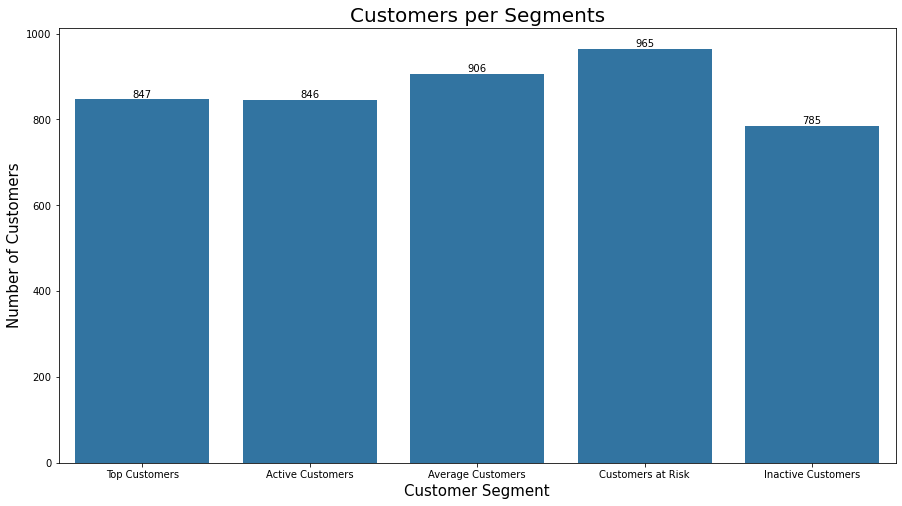

In [27]:
# visualize segments
cust_segment = rfm.groupby(['CustomerSegment'])['CustomerID'].nunique()

plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]
cat_order = ['Top Customers', 'Active Customers', 'Average Customers', 'Customers at Risk', 'Inactive Customers']

g = sb.barplot(x = cust_segment.index, y = cust_segment.values, color=base_color, order = cat_order)
plt.title("Customers per Segments", size=20)
plt.xlabel("Customer Segment", size=15)
plt.ylabel("Number of Customers", size=15)

g.bar_label(g.containers[0])
    
plt.show();

In [28]:
top_active = rfm['CustomerSegment'].isin(['Top Customers', 'Active Customers']).sum() / rfm['CustomerID'].nunique() * 100
average = (rfm['CustomerSegment'] == 'Average Customers').sum() / rfm['CustomerID'].nunique() * 100
inactive_risk = rfm['CustomerSegment'].isin(['Customers at Risk', 'Inactive Customers']).sum() / rfm['CustomerID'].nunique() * 100

print('The proportion of top and active customers to total number of customers is',"{:.2f}".format(top_active),'%')
print('The proportion of average customers to total number of customers is',"{:.2f}".format(average),'%')
print('The proportion of customers at risk and inactive customers to total number of customers is',"{:.2f}".format(inactive_risk),'%')

The proportion of top and active customers to total number of customers is 38.93 %
The proportion of average customers to total number of customers is 20.83 %
The proportion of customers at risk and inactive customers to total number of customers is 40.24 %


#### Insights:
- The combined proportion of top, active and average customers is almost 60%. This is not bad as 60% of the customer base are making their purchases in a manner that can sustain the online store business.<br><br>

- However, the 40% requires attention from the business owner. These customers need to be reactivated and encouraged to make more purchases and frequently.

#### Recommendations:
- **Inactive Customers** - Send them personalized emails containing discounted items to encourage them to order and be active.<br><br>
- **Customers at Risk** - This group of customers need attention as they made some purchases but it's been a long time since their last purchase. Send them personalized emails as well containing promotional items or free samples of products to try to encourage them to be more active.<br><br>
- **Average Customers** - This group of customers are not consistently inactive nor active. Send them emails with discounted or promo items for every occasion like their birthdays, mother's day, father's day, Christmas etc.<br><br>
- **Active Customers** - Create loyalty rewards program for this group where they can earn point for every purchase and convert these points into discount or voucher.<br><br>
- **Top Customers** - Send birthday and anniversary (as being customer) cards with discount vouchers. Create a referral program where they can get a discount upon the first purchase of their referrals.

<a id='prod_rfm'></a>
## Product Segmentation using RFM
Product segmentation using RFM to analyze the sales performance of the products based on recency, frequency and monetary value.

In [29]:
# create df for product rfm
rfm_df2 = ecom_df.copy()

In [30]:
# check the start and end date of the transactions
print('Transactions timeframe from {} to {}'.format(rfm_df2['InvoiceDate'].min(), rfm_df2['InvoiceDate'].max()))

Transactions timeframe from 2018-11-29 to 2019-12-07


In [31]:
# create hypothetical snapshot_day since the data comes from 2018 and 2019
snapshot_date = rfm_df2['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2019-12-08


#### Calculate Product RFM Metrics

In [32]:
# aggregate data on a product level
prod_rfm = rfm_df2.groupby(['StockCode']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'})

In [33]:
prod_rfm.rename(columns = {'InvoiceDate': 'Recency',
                          'InvoiceNo': 'Frequency',
                          'TotalSales': 'MonetaryValue'}, inplace=True)

In [34]:
# check the first rows of data
print(prod_rfm.head())
print('There are {:,} records of products grouped by recency, frequency and monetary value'. format(prod_rfm.shape[0]))

           Recency  Frequency  MonetaryValue
StockCode                                   
10002          236         71         759.89
10080           19         22         119.09
10120            6         30          40.53
10123C         254          3           3.25
10124A          34          5           6.72
There are 3,919 records of products grouped by recency, frequency and monetary value


In [35]:
prod_rfm.describe()

,Recency,Frequency,MonetaryValue
count,3919.000000,3919.000000,3919.000000
mean,47.880071,135.832610,2499.526124
std,91.668001,199.600681,6267.110954
min,1.000000,1.000000,-54.000000
25%,1.000000,16.000000,123.665000
50%,3.000000,66.000000,666.380000
75%,32.000000,169.500000,2163.605000
max,374.000000,2299.000000,164751.390000


In [36]:
# deal with negative values on MonetaryValue
print('The number of observations with negative monetary values: ', (prod_rfm['MonetaryValue']<0).sum())

# add the absolute value of the lowest negative value to each monetary values then add 1
prod_rfm['MonetaryValue'] +=55 
prod_rfm.describe()

The number of observations with negative monetary values:  19


,Recency,Frequency,MonetaryValue
count,3919.000000,3919.000000,3919.000000
mean,47.880071,135.832610,2554.526124
std,91.668001,199.600681,6267.110954
min,1.000000,1.000000,1.000000
25%,1.000000,16.000000,178.665000
50%,3.000000,66.000000,721.380000
75%,32.000000,169.500000,2218.605000
max,374.000000,2299.000000,164806.390000


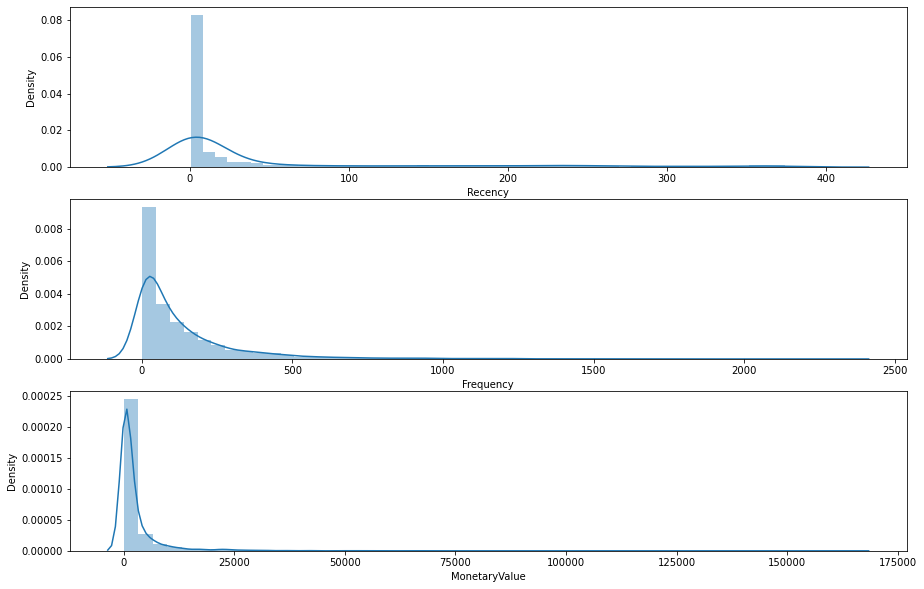

In [37]:
# plot Product RFM distributions
plt.figure(figsize=[15,10])

#plot distribution of recency
plt.subplot(3, 1, 1)
sb.distplot(prod_rfm['Recency'])

#plot distribution of frequency
plt.subplot(3, 1, 2)
sb.distplot(prod_rfm['Frequency'])

#plot distribution of monetary value
plt.subplot(3, 1, 3)
sb.distplot(prod_rfm['MonetaryValue'])

plt.show();

> The distribution of Recency, Frequency and Monetary Value metrics are all right skewed.

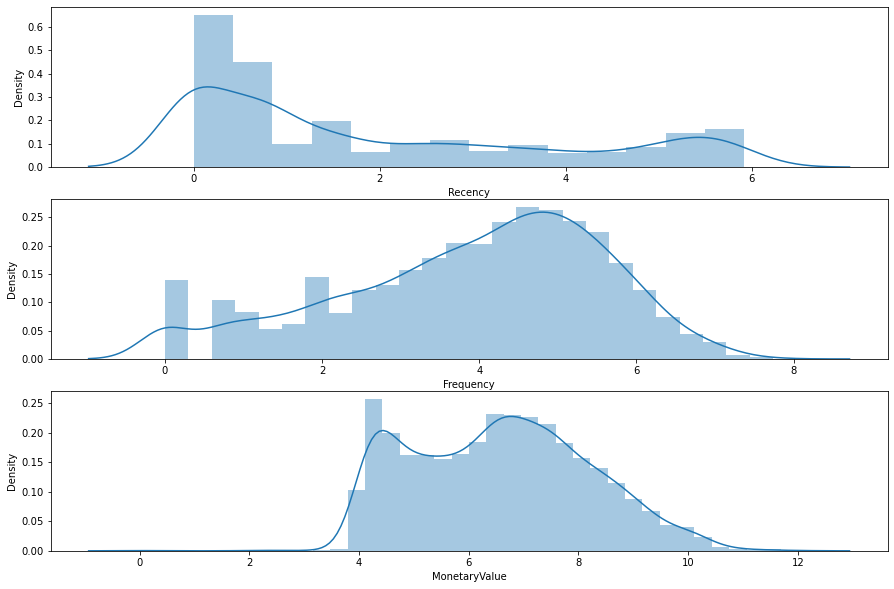

In [38]:
# unskew the data
prod_rfm_log = np.log(prod_rfm)

# plot transfomed product RFM distributions
plt.figure(figsize=[15,10])

#plot distribution of recency
plt.subplot(3, 1, 1)
sb.distplot(prod_rfm_log['Recency'])

#plot distribution of frequency
plt.subplot(3, 1, 2)
sb.distplot(prod_rfm_log['Frequency'])

#plot distribution of monetary value
plt.subplot(3, 1, 3)
sb.distplot(prod_rfm_log['MonetaryValue'])

plt.show();

In [39]:
# centering and scaling as KMeans works better on variables with the same mean and standard deviation
#initialize StandardScaler and fit 
scaler = StandardScaler()
scaler.fit(prod_rfm_log)

# transform and store the scaled data for clustering
prod_rfm_normalized = scaler.transform(prod_rfm_log)

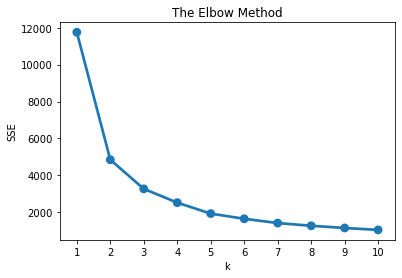

In [40]:
# fit KMeans and calculate sum of squared errors for each k
sse = {}
for k in range(1, 11):
    
    #initialize Kmeans with k clusters and fit it
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(prod_rfm_normalized)
    
    # assign sum of squared distance to k element of the sse dictionary
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

#plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sb.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show();

> The point 2 and 3 clusters are where we identify the largest angle

In [41]:
# run KMeans using 2 clusters
kmeans = KMeans(n_clusters=2, random_state=1)

#fit k-means clustering on the normalized dataset
kmeans.fit(prod_rfm_normalized)

#extract cluster labels
cluster_labels_2 = kmeans.labels_

In [42]:
# create a cluster label column in the prod_rfm
prod_rfm_k2 = prod_rfm.assign(Cluster=cluster_labels_2)

# group data by cluster
grouped_k2 = prod_rfm_k2.groupby(['Cluster'])

# calculate average RFM values and segment sizes per cluster value
grouped_k2.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           5.2     209.0        3981.3  2430
1         117.5      16.5         226.0  1489

In [43]:
# run KMeans using 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

#fit k-means clustering on the normalized dataset
kmeans.fit(prod_rfm_normalized)

#extract cluster labels
cluster_labels_3 = kmeans.labels_

In [44]:
# create a cluster label column in the prod_rfm
prod_rfm_k3 = prod_rfm.assign(Cluster=cluster_labels_3)

# group data by cluster
grouped_k3 = prod_rfm_k3.groupby(['Cluster'])

# calculate average RFM values and segment sizes per cluster value
grouped_k3.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         160.2      10.3         167.4  1008
1           2.9     306.1        6231.5  1423
2          14.8      58.0         655.2  1488

#### The 3-segment solution gives more insights than the 2-segment:

- **Cluster 0** - is the worst-performing product group with average recency of 160 days, average frequency of 10 times and average sales of 167.<br><br>

- **Cluster 1** - is the best-performing product group with average recency of 2.9 days, average frequency of 306 times, and average sales of 6,231.<br><br>

- **Cluster 2** - is quite good and not bad with average recency of 15 days, average frequency of 58 times and average sales of 655.<br><br>
 
#### Recommendations:
- **Cluster 0** - Review the products in this cluster, it probably needs to have more assortment or variety, current stocks are maybe in incomplete sizes or colors and maybe the products are out of season or outdated. Recency of 160 days is like more than 5 months since the last time the products were purchased. Frequency of only 10 times is like the products are being purchased not even once a month. Sales of 167 throughout the year is very low.<br><br>

- **Cluster 1** - For Cluster 1 products, probably add more variety and increase the quantities. Monitor the inventories so these products won't go out of stock. Continue whatever the existing advertising or marketing campaigns for these products.<br><br>

- **Cluster 2** - For Cluster 2, with recency of 15, it is good. It means the products are marketable or saleable currently. However, the frequency of 58 times is quite rare and sales of 655 is low, it's like the products are being purchased about 5 times a month. This can be increased by creating more advertising and promotional strategies to target specific customer demographics.

<a id='prod_cat'></a>
## Product Category Identification
Product categorization is important as the quality of product analysis depends heavily on the ability to accurately cluster similar products.

In [45]:
#load data
cat_df = ecom_df.copy()

In [46]:
cat_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29,2.55,17850,15.30,11,3,Thursday,8,2018-11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29,2.75,17850,22.00,11,3,Thursday,8,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11


In [47]:
cat_df['Description'].nunique()

4021

In [48]:
# convert Description in lower case and store in Text column
cat_df['Text'] = cat_df['Description'].str.lower()
cols = ['InvoiceNo', 'StockCode', 'Description', 'Text', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'TotalSales', 'TransactionMonth',
       'TransactionDay', 'TransactionWeekday', 'TransactionHour',
       'TransactionPeriod']
cat_df = cat_df[cols]

In [49]:
cat_df.head()

,InvoiceNo,StockCode,Description,Text,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart t-light holder,6,2018-11-29,2.55,17850,15.30,11,3,Thursday,8,2018-11
1,536365,71053,WHITE METAL LANTERN,white metal lantern,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,8,2018-11-29,2.75,17850,22.00,11,3,Thursday,8,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart.,6,2018-11-29,3.39,17850,20.34,11,3,Thursday,8,2018-11


In [50]:
# remove stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

cat_df['Text'] = cat_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

TF-IDF stands for term-frequency - inverse document frequency. It is a commonly used natural language processing model that helps you determine the most important words in each document in the corpus. The idea behind tf-idf is that each corpus might have more shared words than just stopwords. These common words are like stopwords and should be removed or at least down-weighted in importance.
For example, if I am an astronomer, ‘sky’ might be used often but is not important, so I want to downweight that word. TF-Idf does precisely that. It will take texts that share common language and ensure the most common words across the entire corpus don't show up as keywords. Tf-idf helps keep the document-specific frequent words weighted high and the common words across the entire corpus weighted low.


In [51]:
# create tf-idf vectors for Text column
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize a TFidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

#transform Text
X = tfidf_vectorizer.fit_transform(cat_df['Text'])

In [52]:
# fit KMeans and calculate sum of squared distances for each k
ssd = {}
for k in range(1, 11):
    
    #initialize Kmeans with k clusters and fit it
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    
    # assign sum of squared distance to k element of the sse dictionary
    ssd[k] = km.inertia_ # sum of squared distances to closest cluster center

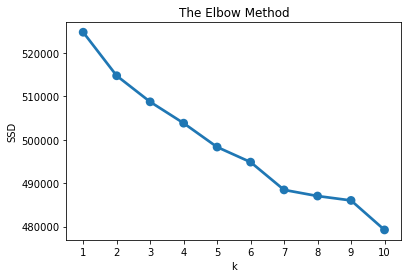

In [53]:
#plot SSD for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSD')
sb.pointplot(x=list(ssd.keys()), y=list(ssd.values()))
plt.show();

> Point 7 and 9 are where we identify the largest angle

In [54]:
# run KMeans using 7 clusters
kmeans7 = KMeans(n_clusters=7, random_state=1)

#fit k-means clustering on the normalized dataset
model7 = kmeans7.fit(X)

#extract cluster labels
cluster_labels_7 = model7.labels_

# create Cluster7 column in the cat_df
cat_df = cat_df.assign(Cluster7=cluster_labels_7)

In [55]:
# run KMeans using 9 clusters
kmeans9 = KMeans(n_clusters=9, random_state=1)

#fit k-means clustering on the normalized dataset
model9 = kmeans9.fit(X)

#extract cluster labels
cluster_labels_9 = model9.labels_

# create Cluster9 column in the cat_df
cat_df = cat_df.assign(Cluster9=cluster_labels_9)

In [56]:
cat_df[['Description', 'Text', 'Cluster7', 'Cluster9']].head()

,Description,Text,Cluster7,Cluster9
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart t-light holder,1,1
1,WHITE METAL LANTERN,white metal lantern,4,4
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,0,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,3,8
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart.,1,1


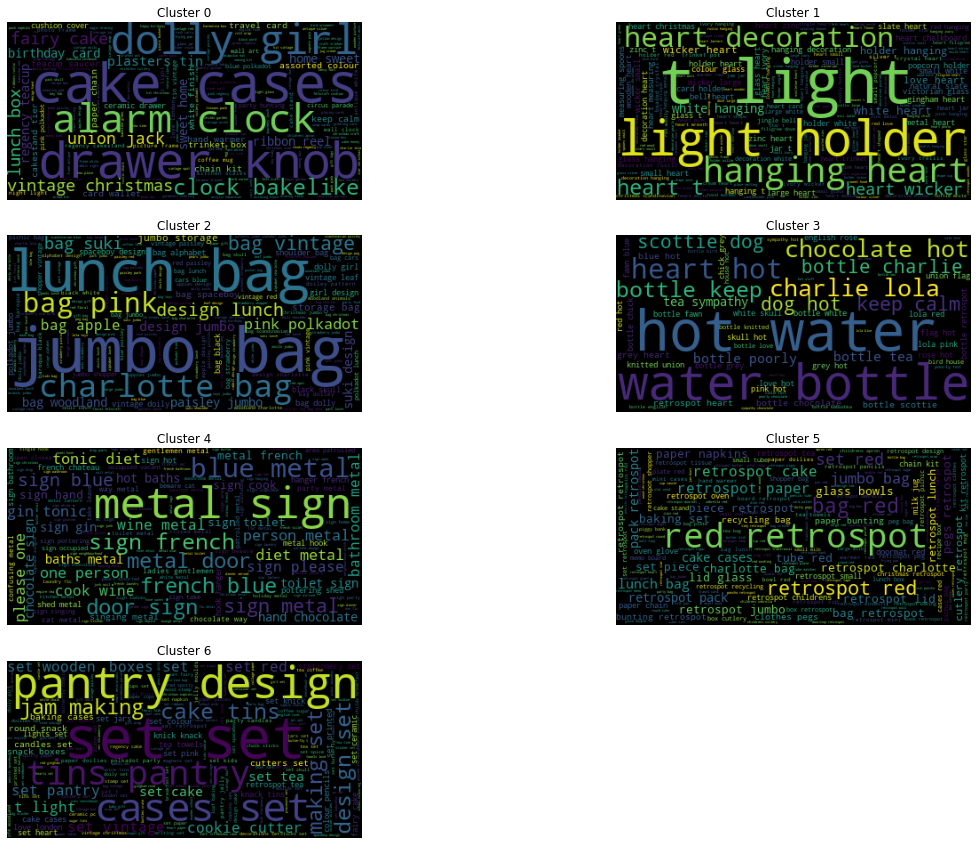

In [57]:
# get the most occuring words in the Text for each cluster in Cluster7 using wordcloud
from wordcloud import WordCloud

fig = plt.figure(figsize=[20, 15])
for c in range (len(cat_df['Cluster7'].unique())):
    ax = fig.add_subplot(4, 2, c+1)
    ax.set_title('Cluster %d'%c)
    cluster = cat_df[cat_df['Cluster7'] == c]
    wordcloud = WordCloud(max_words=1000, margin=0).generate(' '.join(cluster['Text']))
    ax.imshow(wordcloud)
    ax.axis('off')

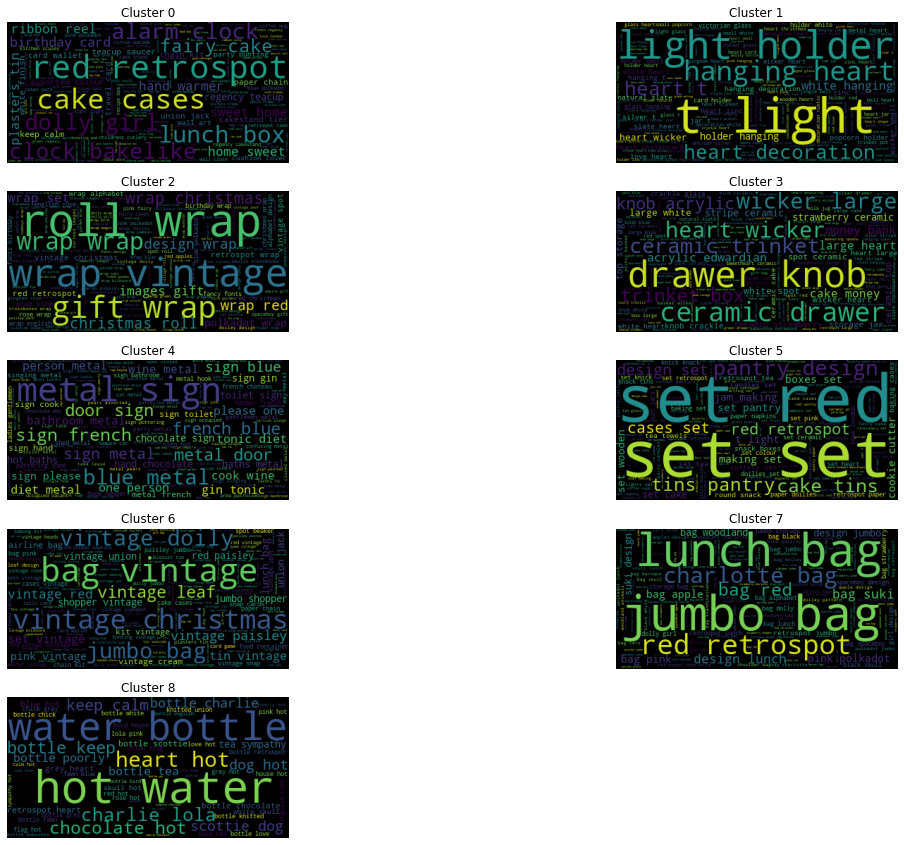

In [58]:
# get the most occuring words in the Text for each cluster in Cluster9

fig = plt.figure(figsize=[20, 15])
for c in range (len(cat_df['Cluster9'].unique())):
    ax = fig.add_subplot(5, 2, c+1)
    ax.set_title('Cluster %d'%c)
    cluster = cat_df[cat_df['Cluster9'] == c]
    wordcloud = WordCloud(max_words=1000, margin=0).generate(' '.join(cluster['Text']))
    ax.imshow(wordcloud)
    ax.axis('off')

#### Based on wordcloud outputs, the 9-cluster solution is more appropriate to use
- 1. Cluster 0 - Retrospot Items
- 2. Cluster 1 - Tea light Holder and Decorations
- 3. Cluster 2 - Arts, Crafts and Gifts
- 4. Cluster 3 - Kitchen, Hardware and Storage
- 5. Cluster 4 - Signages
- 6. Cluster 5 - Pantry Items
- 7. Cluster 6 - Vintage Items
- 8. Cluster 7 - Bags
- 9. Cluster 8 - Food and Beverage Carriers

In [59]:
# use clusters to group customers into category names
def create_category(df):
    """pass a dataframe and return category based on clusters"""
    if df['Cluster9'] == 0:
        return 'Retrospot Items'
    elif df['Cluster9'] == 1:
        return 'Tea light Holders and Decorations'
    elif df['Cluster9'] == 2:
        return 'Arts, Crafts and Gifts'
    elif df['Cluster9'] == 3:
        return 'Kitchen, Hardware and Storage'
    elif df['Cluster9'] == 4:
        return 'Signages'
    elif df['Cluster9'] == 5:
        return 'Pantry Items'
    elif df['Cluster9'] == 6:
        return 'Vintage Items'
    elif df['Cluster9'] == 7:
        return 'Bags'
    else:
        return 'Food and Beverages Carriers'
    
# apply function to cat_df and create a variable Category
cat_df['Category'] = cat_df.apply(create_category, axis=1)

In [60]:
cols1 = ['InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Category',
        'Quantity', 'UnitPrice', 'TotalSales', 'CustomerID', 'TransactionMonth',
       'TransactionDay', 'TransactionWeekday', 'TransactionHour',
       'TransactionPeriod', 'Text', 'Cluster7', 'Cluster9']
cat_df = cat_df[cols1]

In [61]:
cat_df.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Category,Quantity,UnitPrice,TotalSales,CustomerID,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPeriod,Text,Cluster7,Cluster9
0,536365,2018-11-29,85123A,WHITE HANGING HEART T-LIGHT HOLDER,Tea light Holders and Decorations,6,2.55,15.30,17850,11,3,Thursday,8,2018-11,white hanging heart t-light holder,1,1
1,536365,2018-11-29,71053,WHITE METAL LANTERN,Signages,6,3.39,20.34,17850,11,3,Thursday,8,2018-11,white metal lantern,4,4
2,536365,2018-11-29,84406B,CREAM CUPID HEARTS COAT HANGER,Retrospot Items,8,2.75,22.00,17850,11,3,Thursday,8,2018-11,cream cupid hearts coat hanger,0,0
3,536365,2018-11-29,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,Food and Beverages Carriers,6,3.39,20.34,17850,11,3,Thursday,8,2018-11,knitted union flag hot water bottle,3,8
4,536365,2018-11-29,84029E,RED WOOLLY HOTTIE WHITE HEART.,Tea light Holders and Decorations,6,3.39,20.34,17850,11,3,Thursday,8,2018-11,red woolly hottie white heart.,1,1


In [62]:
cat_df.to_csv('cat_df.csv', index=False)

<a id='prod_range'></a>
## Product Category Analysis

In [5]:
# reload and read data
prod_range = pd.read_csv('cat_df.csv', parse_dates=['InvoiceDate'])
prod_range.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Category,Quantity,UnitPrice,TotalSales,CustomerID,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPeriod,Text,Cluster7,Cluster9
0,536365,2018-11-29,85123A,WHITE HANGING HEART T-LIGHT HOLDER,Tea light Holders and Decorations,6,2.55,15.30,17850.0,11,3,Thursday,8,2018-11,white hanging heart t-light holder,1,1
1,536365,2018-11-29,71053,WHITE METAL LANTERN,Signages,6,3.39,20.34,17850.0,11,3,Thursday,8,2018-11,white metal lantern,4,4
2,536365,2018-11-29,84406B,CREAM CUPID HEARTS COAT HANGER,Retrospot Items,8,2.75,22.00,17850.0,11,3,Thursday,8,2018-11,cream cupid hearts coat hanger,0,0
3,536365,2018-11-29,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,Food and Beverages Carriers,6,3.39,20.34,17850.0,11,3,Thursday,8,2018-11,knitted union flag hot water bottle,3,8
4,536365,2018-11-29,84029E,RED WOOLLY HOTTIE WHITE HEART.,Tea light Holders and Decorations,6,3.39,20.34,17850.0,11,3,Thursday,8,2018-11,red woolly hottie white heart.,1,1


### **What are the top performing categories based on quantity sold?**

In [64]:
# sales perfomance of each category based on quantity sold
top_cat_qty = prod_range.groupby('Category')['Quantity'].agg('sum').sort_values(ascending=False)
top_cat_qty

Category
Retrospot Items                      2975736
Tea light Holders and Decorations     522259
Bags                                  477782
Pantry Items                          474154
Vintage Items                         314794
Kitchen, Hardware and Storage         172790
Arts, Crafts and Gifts                168589
Signages                              155951
Food and Beverages Carriers            53711
Name: Quantity, dtype: int64

In [65]:
retrospot_prop = (top_cat_qty[0]/prod_range['Quantity'].sum()) * 100
print('The proportion of quantity sold of Retrospot Items to total quantity sold is ', \
      "{:.2f}".format(retrospot_prop), '%')

The proportion of quantity sold of Retrospot Items to total quantity sold is  55.98 %


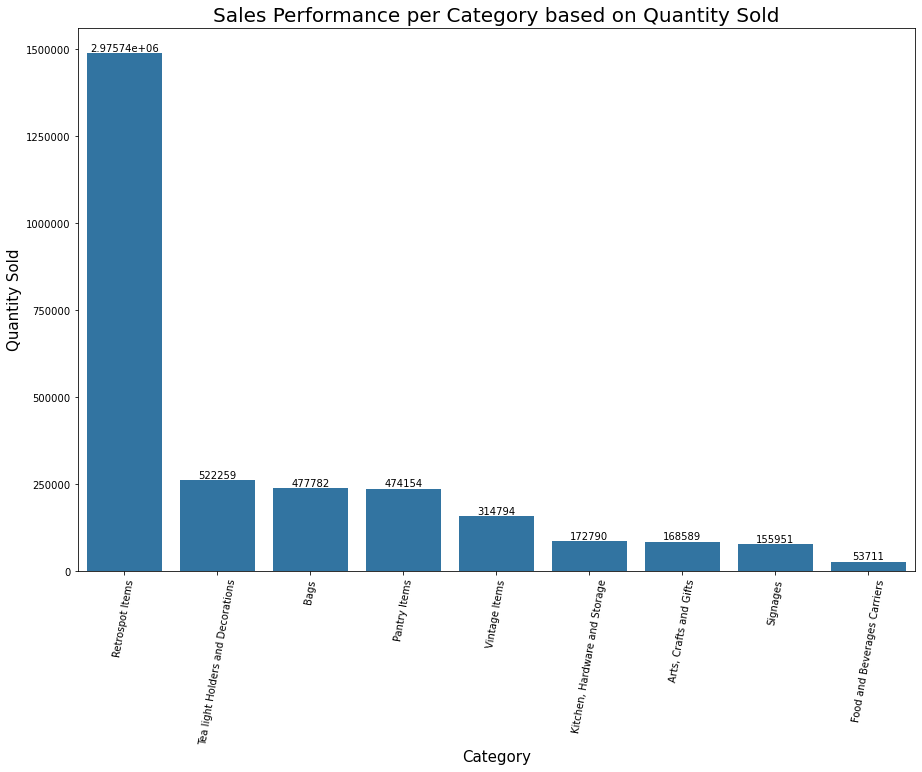

In [66]:
# visualize sales perfomance of each category based on quantity sold
plt.figure(figsize = [15, 10])
base_color = sb.color_palette()[0]

g = sb.barplot(x = top_cat_qty.index, y = top_cat_qty.values, color=base_color)
plt.xticks(rotation=80)
plt.title("Sales Performance per Category based on Quantity Sold", size=20)
plt.xlabel("Category", size=15)
plt.ylabel("Quantity Sold", size=15)
yticks = [0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2500000, 2750000, 3000000]
g.set_yticklabels(yticks)
g.bar_label(g.containers[0])
plt.show();

> **The top performing category based on quantity sold is Retrospot items which is almost 56% of the total quantity sold. The worst-performing is Food and Beverage Carriers category.**

### **Which product categories contribute significantly to the total sales?**

In [67]:
# sales perfomance of each category based on total sales
top_cat_sales = prod_range.groupby('Category')['TotalSales'].agg('sum').sort_values(ascending=False)
top_cat_sales

Category
Retrospot Items                      5481816.20
Pantry Items                         1064459.64
Bags                                  874865.44
Tea light Holders and Decorations     757572.83
Vintage Items                         644391.12
Kitchen, Hardware and Storage         335336.38
Signages                              291994.71
Food and Beverages Carriers           264633.85
Arts, Crafts and Gifts                 80572.71
Name: TotalSales, dtype: float64

In [68]:
retrospot_props = (top_cat_sales[0]/prod_range['TotalSales'].sum()) * 100
print('The proportion of sales of Retrospot Items to total sales is ', \
      "{:.2f}".format(retrospot_props), '%')

The proportion of sales of Retrospot Items to total sales is  55.96 %


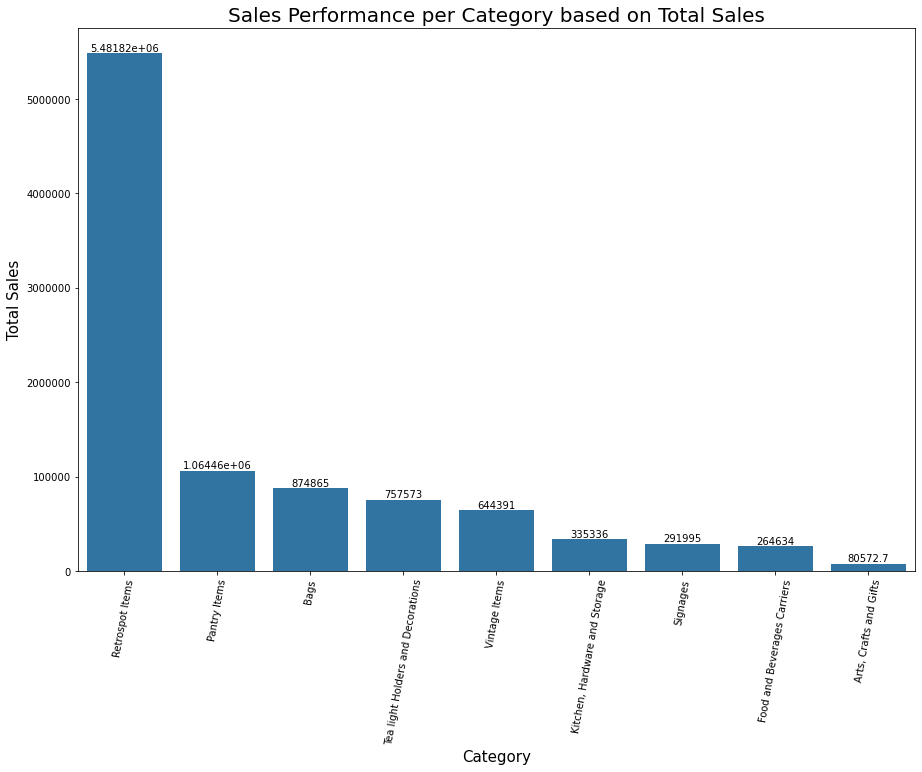

In [69]:
# visualize sales perfomance of each category based on sales
plt.figure(figsize = [15, 10])
base_color = sb.color_palette()[0]

g = sb.barplot(x = top_cat_sales.index, y = top_cat_sales.values, color=base_color)
plt.xticks(rotation=80)
plt.title("Sales Performance per Category based on Total Sales", size=20)
plt.xlabel("Category", size=15)
plt.ylabel("Total Sales", size=15)
yticks = [0, 100000, 2000000, 3000000, 4000000, 5000000]
g.set_yticklabels(yticks)
g.bar_label(g.containers[0])
plt.show();

> **Retrospot items is the product category that contribute significantly to total sales. More than half of the total sales (56%) are from Retrospot Items category. The worst-performing is Arts, Crafts and Gifts category.**

#### How do the monthly sales figures per each category look like? 

In [70]:
# monthly sales per category 
monthly_sales_cat = prod_range.groupby(['TransactionPeriod', 'Category'])['TotalSales'].agg('sum').reset_index()
monthly_sales_cat

,TransactionPeriod,Category,TotalSales
0,2018-11,"Arts, Crafts and Gifts",419.66
1,2018-11,Bags,3417.41
2,2018-11,Food and Beverages Carriers,4238.50
3,2018-11,"Kitchen, Hardware and Storage",3782.53
4,2018-11,Pantry Items,9336.23
...,...,...,...
121,2019-12,Pantry Items,33469.77
122,2019-12,Retrospot Items,190221.13
123,2019-12,Signages,12347.19
124,2019-12,Tea light Holders and Decorations,28599.16


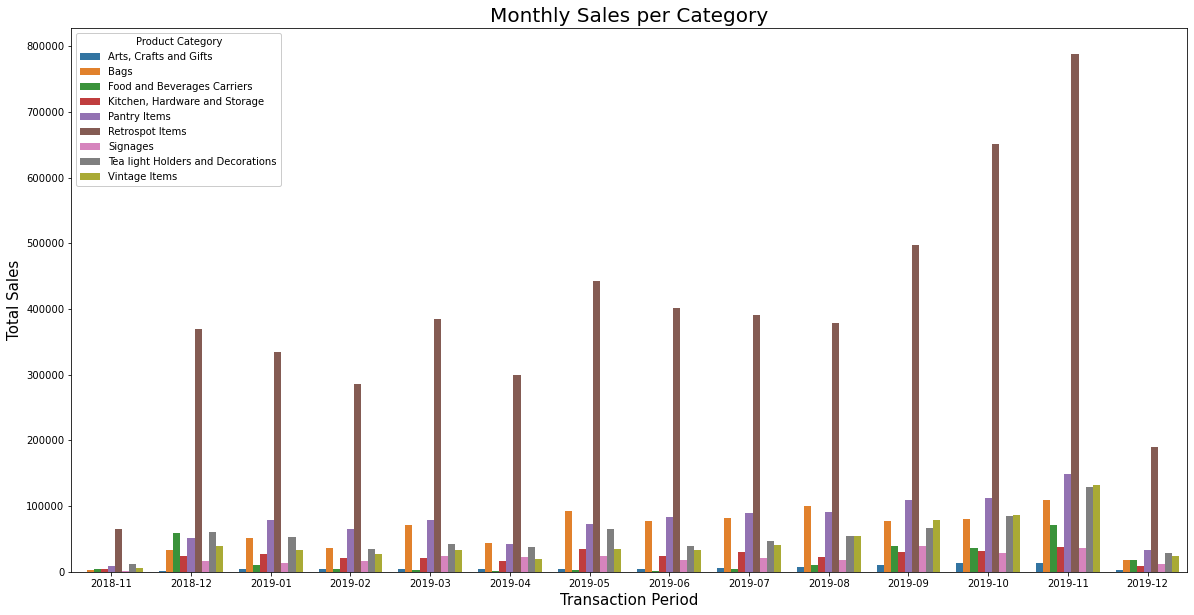

In [71]:
# visualize monthly sales per category 
plt.figure(figsize = [20, 10])
g = sb.barplot(data= monthly_sales_cat, x = 'TransactionPeriod', y = 'TotalSales', 
               hue = 'Category', errwidth=0)
plt.title("Monthly Sales per Category", size=20)
plt.xlabel("Transaction Period", size=15)
plt.ylabel("Total Sales", size=15)
g.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Product Category')
plt.show();

> **Retrospot Items is the leading category every month. Retrospot Items' highest sales is for the period of 11-2019.**

#### How do the average daily sales figures per each category look like? 

In [73]:
# average daily sales per category
ave_daily_sales_cat = prod_range.groupby(['TransactionPeriod', 'Category'])['TotalSales'].agg('sum').reset_index()
ave_daily_sales_cat['AverageSales'] = ave_daily_sales_cat['TotalSales']/30
ave_daily_sales_cat

,TransactionPeriod,Category,TotalSales,AverageSales
0,2018-11,"Arts, Crafts and Gifts",419.66,13.988667
1,2018-11,Bags,3417.41,113.913667
2,2018-11,Food and Beverages Carriers,4238.50,141.283333
3,2018-11,"Kitchen, Hardware and Storage",3782.53,126.084333
4,2018-11,Pantry Items,9336.23,311.207667
...,...,...,...,...
121,2019-12,Pantry Items,33469.77,1115.659000
122,2019-12,Retrospot Items,190221.13,6340.704333
123,2019-12,Signages,12347.19,411.573000
124,2019-12,Tea light Holders and Decorations,28599.16,953.305333


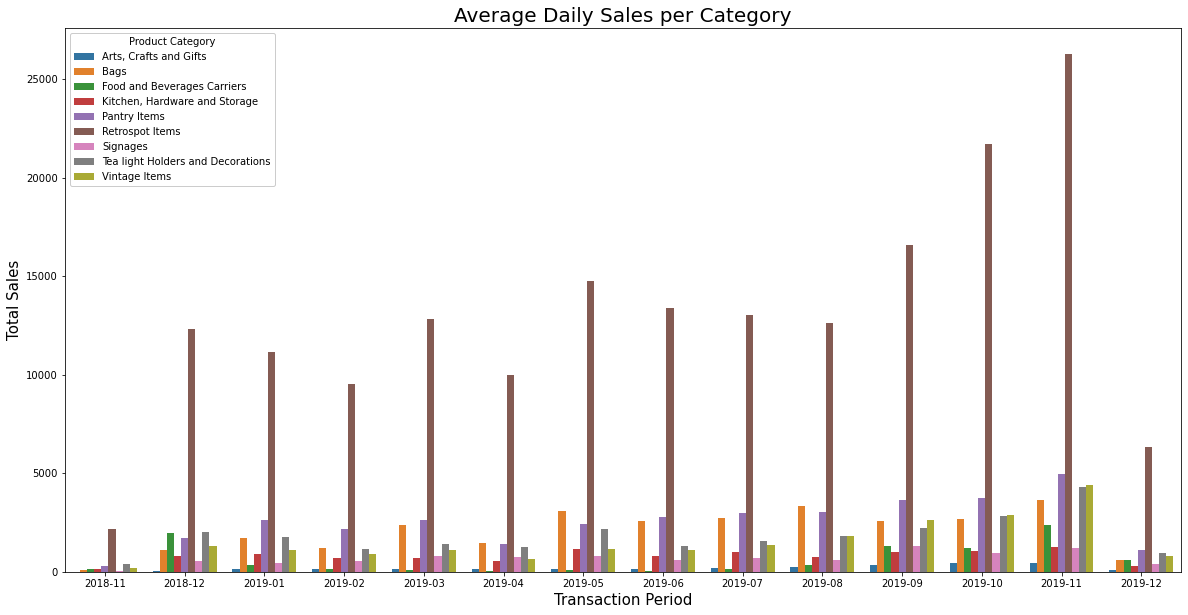

In [74]:
# visualize average daily sales per category 
plt.figure(figsize = [20, 10])
g = sb.barplot(data= ave_daily_sales_cat, x = 'TransactionPeriod', y = 'AverageSales', 
               hue = 'Category', errwidth=0)
plt.title("Average Daily Sales per Category", size=20)
plt.xlabel("Transaction Period", size=15)
plt.ylabel("Total Sales", size=15)
g.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Product Category')
plt.show();

> **Daily average sales is computed by dividing the monthly sales by 30 days.**
> **Retrospot Items remain consistently the highest sales generating every month.**

#### How do the average monthly sales figures per each category look like? 

In [75]:
# average monthly sales per category
ave_monthly_sales = prod_range.groupby(['Category'])['TotalSales'].agg('sum').sort_values(ascending=False).reset_index()
ave_monthly_sales['AverageSales'] = ave_monthly_sales['TotalSales'] / 12
ave_monthly_sales

,Category,TotalSales,AverageSales
0,Retrospot Items,5481816.20,456818.016667
1,Pantry Items,1064459.64,88704.970000
2,Bags,874865.44,72905.453333
3,Tea light Holders and Decorations,757572.83,63131.069167
4,Vintage Items,644391.12,53699.260000
5,"Kitchen, Hardware and Storage",335336.38,27944.698333
6,Signages,291994.71,24332.892500
7,Food and Beverages Carriers,264633.85,22052.820833
8,"Arts, Crafts and Gifts",80572.71,6714.392500


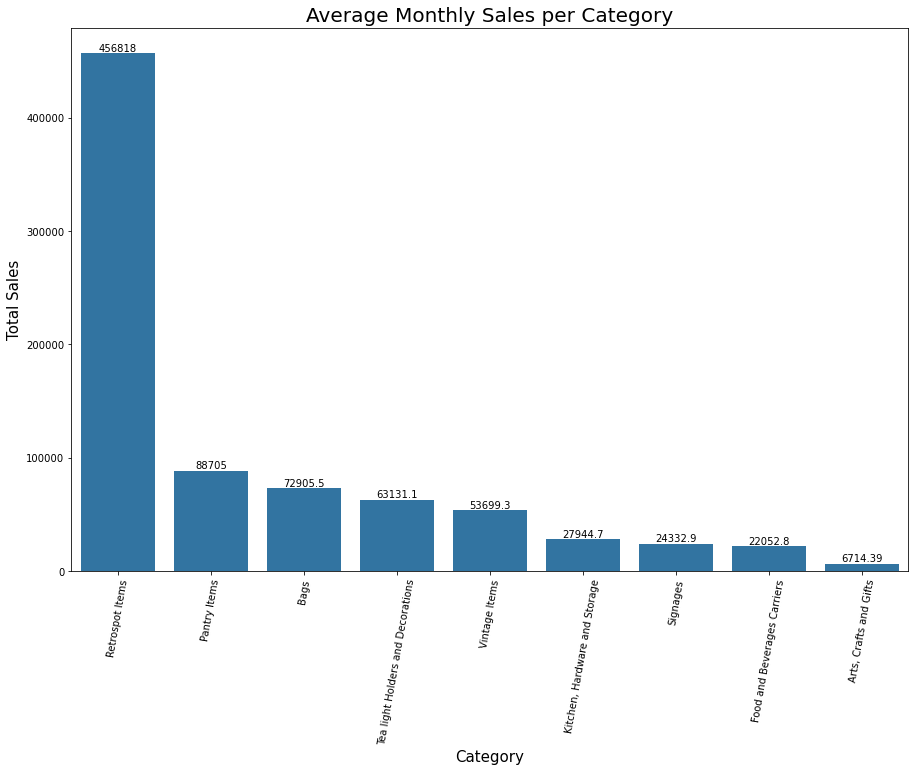

In [76]:
# visualize average monthly sales per category
plt.figure(figsize = [15, 10])
base_color = sb.color_palette()[0]

g = sb.barplot(data= ave_monthly_sales, x = 'Category', y = 'AverageSales', color=base_color)
plt.xticks(rotation=80)
plt.title("Average Monthly Sales per Category", size=20)
plt.xlabel("Category", size=15)
plt.ylabel("Total Sales", size=15)
#yticks = [0, 100000, 2000000, 3000000, 4000000, 5000000]
#g.set_yticklabels(yticks)
g.bar_label(g.containers[0])
plt.show();

> **Monthly average sales is computed by dividing the total sales by 12 months.**
> **Retrospot Items has the highest average monthly sales and Arts, Craft and Gifts category has the lowest average monthly sales.**

#### Which Day of the Week has the higest sales per Category?

In [77]:
# day of the week sales per Category
sales_weekday_cat = prod_range.groupby(['TransactionWeekday', 'Category'])['TotalSales'].agg('sum').reset_index()
sales_weekday_cat

,TransactionWeekday,Category,TotalSales
0,Friday,"Arts, Crafts and Gifts",15708.35
1,Friday,Bags,181103.47
2,Friday,Food and Beverages Carriers,47744.13
3,Friday,"Kitchen, Hardware and Storage",63598.56
4,Friday,Pantry Items,229910.54
5,Friday,Retrospot Items,1191954.01
6,Friday,Signages,56191.25
7,Friday,Tea light Holders and Decorations,161321.06
8,Friday,Vintage Items,134958.91
9,Monday,"Arts, Crafts and Gifts",7263.19


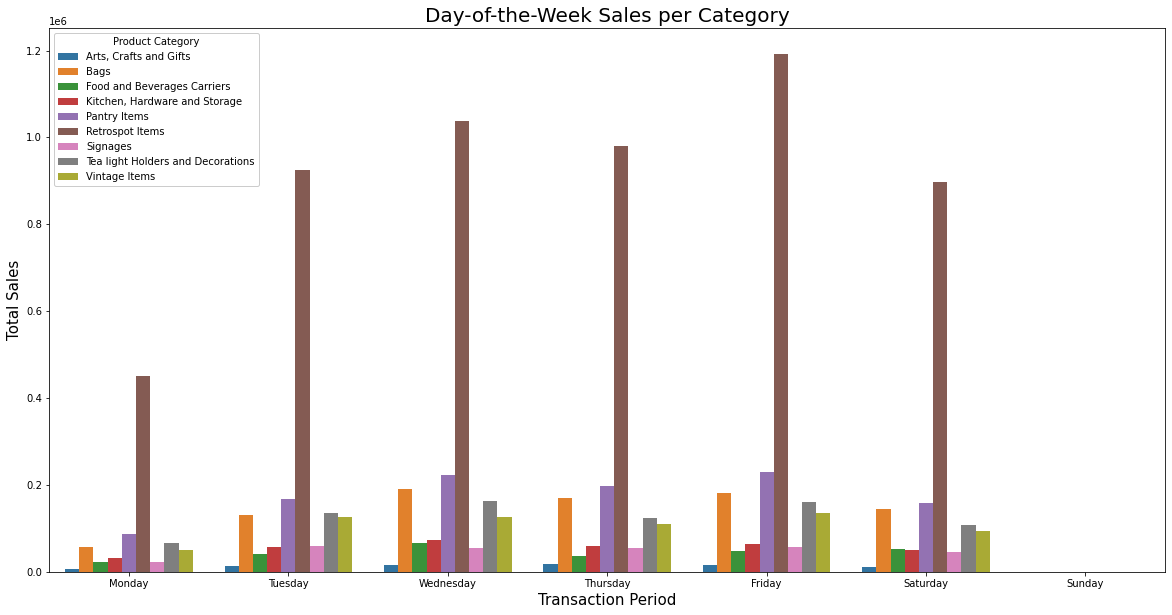

In [78]:
# visualize day of the week sales per Category
plt.figure(figsize = [20, 10])
cat_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

g = sb.barplot(data= sales_weekday_cat, x = 'TransactionWeekday', y = 'TotalSales', 
               hue = 'Category', errwidth=0, order = cat_order)
plt.title("Day-of-the-Week Sales per Category", size=20)
plt.xlabel("Transaction Period", size=15)
plt.ylabel("Total Sales", size=15)
g.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Product Category')
plt.show();

> **Throughout the year, Retrospot Items remains the highest sales generating per day of the week.**

#### For Retrospot Items, which month has the highest sales? 

In [80]:
# retrospot monthly sales
retrospot_df = prod_range[prod_range['Category'] == 'Retrospot Items']
retrospot_monthly_sales = retrospot_df.groupby('TransactionPeriod')['TotalSales'].agg('sum')
retrospot_monthly_sales

TransactionPeriod
2018-11     64700.75
2018-12    369051.75
2019-01    335169.84
2019-02    286017.42
2019-03    384472.27
2019-04    299947.20
2019-05    443255.76
2019-06    401859.79
2019-07    390972.03
2019-08    378391.89
2019-09    498323.92
2019-10    651195.22
2019-11    788237.23
2019-12    190221.13
Name: TotalSales, dtype: float64

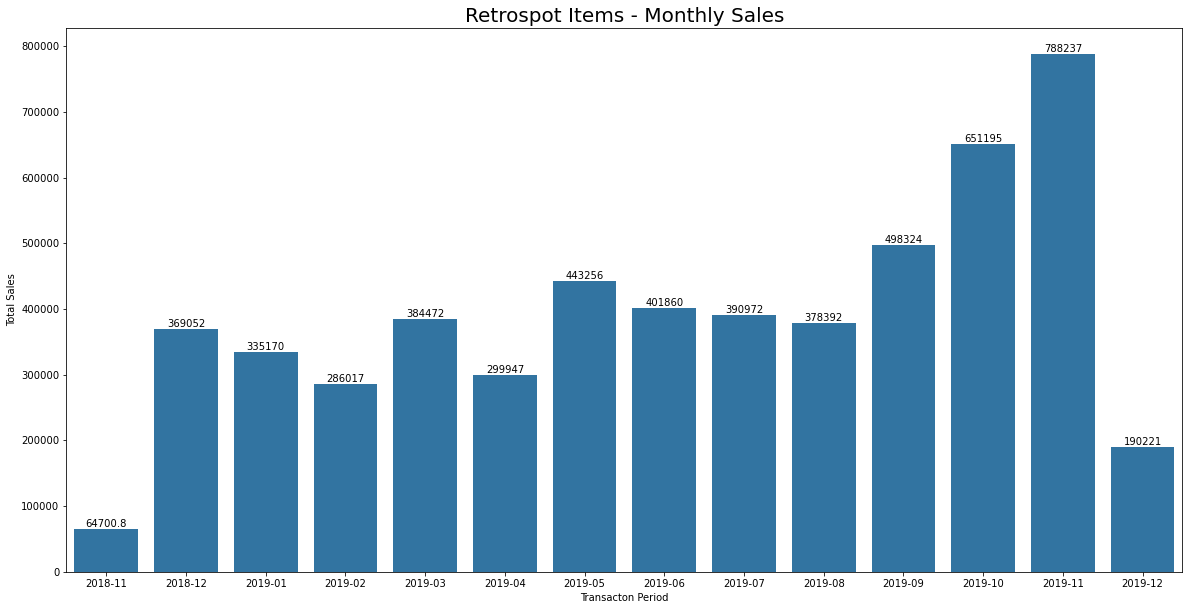

In [82]:
# visualize retrospot monthly sales
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

g = sb.barplot(x = retrospot_monthly_sales.index, y = retrospot_monthly_sales.values, color=base_color)
plt.title("Retrospot Items - Monthly Sales", size=20)
plt.xlabel("Transacton Period", size=10)
plt.ylabel("Total Sales", size=10)
g.bar_label(g.containers[0])
plt.show();

> **For Retrospot, the highest sales was made during the period of 11-2019.**

In [83]:
# retrospot actual monthly sales and average monthly sales
retrospot_ave_sales = retrospot_df.groupby('TransactionPeriod')['TotalSales'].agg('sum').reset_index()
retrospot_ave_sales['AverageSales'] = retrospot_ave_sales['TotalSales'].sum() / 12
retrospot_ave_sales

,TransactionPeriod,TotalSales,AverageSales
0,2018-11,64700.75,456818.016667
1,2018-12,369051.75,456818.016667
2,2019-01,335169.84,456818.016667
3,2019-02,286017.42,456818.016667
4,2019-03,384472.27,456818.016667
5,2019-04,299947.20,456818.016667
6,2019-05,443255.76,456818.016667
7,2019-06,401859.79,456818.016667
8,2019-07,390972.03,456818.016667
9,2019-08,378391.89,456818.016667


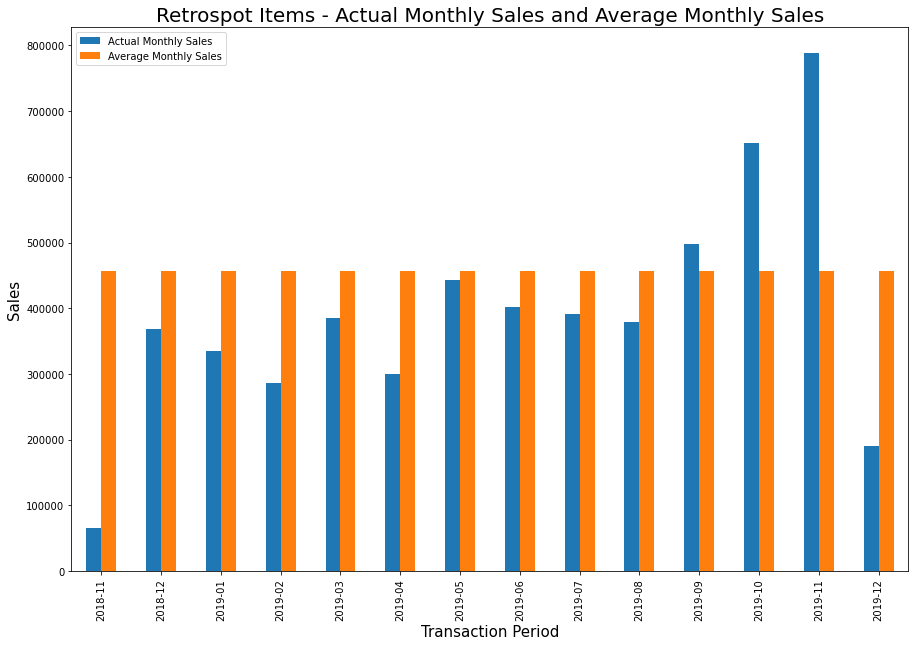

In [84]:
# visualize retrospot actual monthly sales and average monthly sales
retrospot_ave_sales.plot(kind = 'bar', x = 'TransactionPeriod', figsize = (15,10))
plt.title('Retrospot Items - Actual Monthly Sales and Average Monthly Sales', fontsize = 20)
plt.xlabel('Transaction Period', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend(["Actual Monthly Sales", "Average Monthly Sales"]);

> **Based on the plot, the actual sales of products in the Restrospot Items category were fluctuating from 12-2018 until 08-2019. Then it started to get high and higher on 09-2019 until 11-2019. The period 12-2019 is only for 7 days so it could probably be high during this period as well.**

In [36]:
# unique products per category
prod_per_cat = prod_range.groupby(['Category'])['Description'].nunique()
prod_per_cat

Category
Arts, Crafts and Gifts                 67
Bags                                   67
Food and Beverages Carriers            25
Kitchen, Hardware and Storage         140
Pantry Items                          335
Retrospot Items                      2864
Signages                               69
Tea light Holders and Decorations     249
Vintage Items                         205
Name: Description, dtype: int64

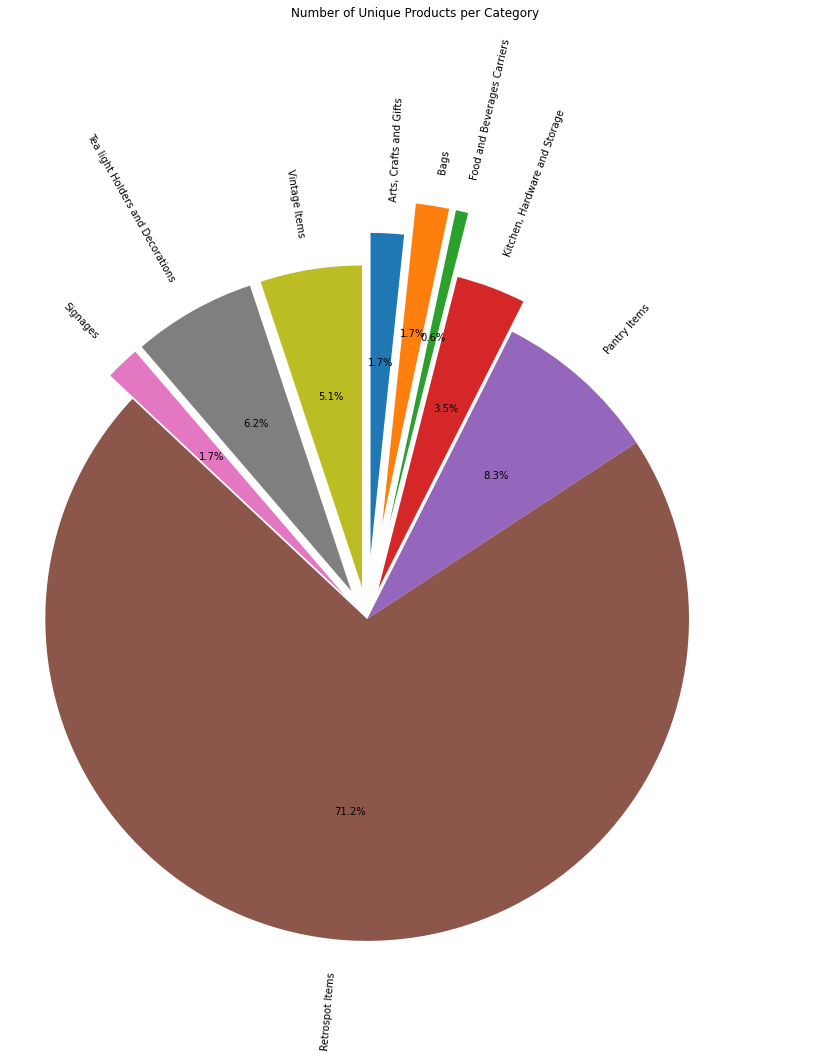

In [35]:
# visualize unique products per category
prod_per_cat.plot(kind='pie', labels=prod_per_cat.index, autopct='%1.1f%%', figsize=(30,15), startangle=90, counterclock=False,
                 explode=[0.2, 0.3, 0.3, 0.1, 0, 0, 0.1, 0.1, 0.1], rotatelabels = True)

plt.axis('square')
plt.title('Number of Unique Products per Category', pad=150)
plt.ylabel('');

> Retrospot Items category has the largest variety of products

<a id='hypothesis'></a>
## Statistical Hypotheses

In [98]:
from scipy import stats
df = pd.read_csv('ecom_final.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29,2.55,17850.0,15.30,11,3,Thursday,8,2018-11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29,3.39,17850.0,20.34,11,3,Thursday,8,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29,2.75,17850.0,22.00,11,3,Thursday,8,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29,3.39,17850.0,20.34,11,3,Thursday,8,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29,3.39,17850.0,20.34,11,3,Thursday,8,2018-11


### 1. High-priced products contribute to higher sales than the low-priced products

- **Null Hypothesis**: There is no difference between the mean sales of low-priced products and high-priced products
- **Alternative Hypothesis**: Mean sales of low-priced products is different than the mean sales of high-priced products
- **Criteria for Decision**: alpha = 0.05
    - Accept null hypothesis if p-vaue is greater than alpha
    - Reject null hypothesis if p-value is less than alpha
- **Central Limit Theorem**<br>
Apply central limit theorem to see if the means of many samples randomly drawn from the distribution of *TotalSales* values would look like a normal distribution.

<Figure size 864x576 with 0 Axes>

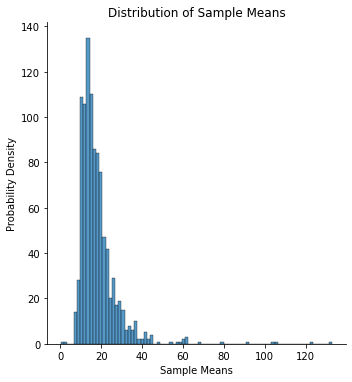

In [99]:
# apply central limit theorem on total sales values
sales = df['TotalSales']

#plot the means of 1000 samples of size 30
sample_means = []
for n in range(1000):
    sample = np.random.choice(sales, 30)
    mean = np.mean(sample)
    sample_means.append(mean)
    
plt.figure(figsize=[12,8])
sb.displot(sample_means)
plt.xlabel('Sample Means')
plt.ylabel('Probability Density')
plt.title('Distribution of Sample Means')
plt.show();

> The distribution looks normal enough with few outliers.

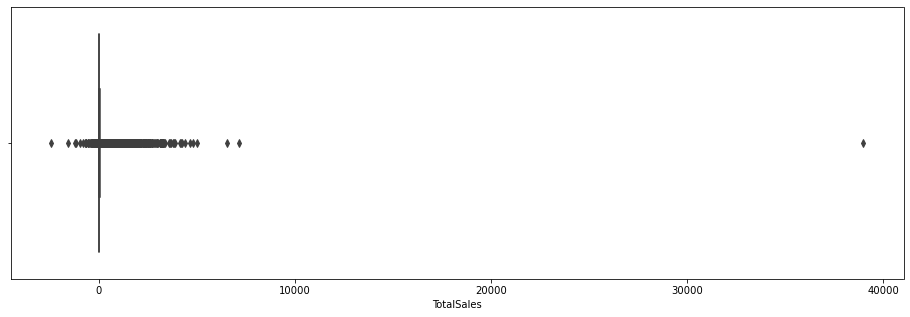

In [100]:
# plot the distribution of Sales values
plt.figure(figsize = [16, 5])
sb.boxplot(sales);

> The plot shows that there are some low and high outliers which need to be removed to ensure that these do not affect the result of hypothesis testing and focus the analysis on the vast majority of behavior of sales.
>
>- IQR = Q3-Q1
>- Low outliers = Q1-1.5(IQR) 
>- High outliers = Q3 + 1.5(IQR)

In [101]:
Q1 = np.percentile(sales, 25)
Q3 = np.percentile(sales, 75)
IQR = Q3-Q1
low_outliers = Q1 - (1.5 * IQR)
high_outliers = Q3 + (1.5 * IQR)

print('Low outliers are values below', low_outliers)
print('High outliers are values above', high_outliers)

Low outliers are values below -16.724999999999998
High outliers are values above 37.875


In [102]:
# get statistical data of total sales values
df['TotalSales'].describe()

count    532328.000000
mean         18.401517
std          82.389604
min       -2432.700000
25%           3.750000
50%           9.840000
75%          17.400000
max       38970.000000
Name: TotalSales, dtype: float64

In [103]:
# remove outliers
sales_trimmed = df.loc[(df['TotalSales'] >= low_outliers) & (df['TotalSales'] <= high_outliers)]
sales_trimmed['TotalSales'].describe()

count    489906.000000
mean         10.241184
std           8.397182
min         -16.650000
25%           3.300000
50%           8.260000
75%          15.790000
max          37.800000
Name: TotalSales, dtype: float64

In [104]:
# create sample data
low_priced = sales_trimmed[sales_trimmed['UnitPrice'] < 20]
high_priced = sales_trimmed[sales_trimmed['UnitPrice'] >= 20]
sample1=low_priced['TotalSales']
sample2=high_priced['TotalSales']

In [105]:
# get statistical data of sample1
sample1.describe()

count    488250.000000
mean         10.190536
std           8.362939
min         -16.650000
25%           3.300000
50%           8.260000
75%          15.600000
max          37.800000
Name: TotalSales, dtype: float64

In [106]:
# get statistical data of sample2
sample2.describe()

count    1656.000000
mean       25.174155
std         3.997849
min        20.000000
25%        20.790000
50%        24.960000
75%        25.490000
max        37.460000
Name: TotalSales, dtype: float64

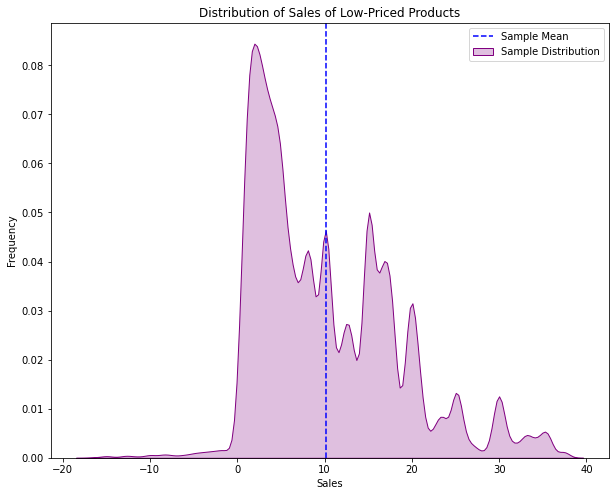

In [107]:
# plot distribution of low-priced sales
plt.figure(figsize=[10,8])
sb.kdeplot(sample1, label='Sample Distribution', color='purple', shade=True)
plt.axvline(x = sample1.mean(), color='blue', linestyle='--', label='Sample Mean')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales of Low-Priced Products')
plt.legend()
plt.show();

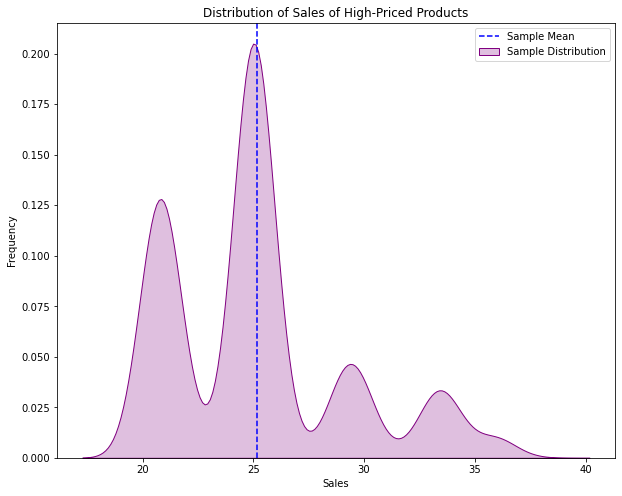

In [108]:
# plot distribution of high-priced sales
plt.figure(figsize=[10,8])
sb.kdeplot(sample2, label='Sample Distribution', color='purple', shade=True)
plt.axvline(x = sample2.mean(), color='blue', linestyle='--', label='Sample Mean')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales of High-Priced Products')
plt.legend()
plt.show();

In [109]:
# perform 2-sample T-test on actual sample data
alpha=0.05
t_results = stats.ttest_ind(sample1, sample2)
print('p-value: ', t_results.pvalue)
if t_results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-value:  0.0
We reject the null hypothesis


In [110]:
# perform Mann-Whitney U test
alpha=0.05
m_results = stats.mannwhitneyu(sample1, sample2)
print('p-value: ', m_results.pvalue)
if m_results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-value:  0.0
We reject the null hypothesis


> **Based on the data, we reject the null hypothesis.**
>
> Based on the result of statistical test and excluding the outliers, we found out that there is a difference between the average sales of low-priced products and average sales of high-priced products. Low price values are unit prices below 20 and high price values are unit prices 20 and above. This could also mean that the average sales of low-priced products can be higher than the average sales of high-priced products or vice-versa.

### 2. Sales are higher during Christmas season (December) as compared to other months.

- **Null Hypothesis**: There is no difference between the average sales in December and the average sales in other months
- **Alternative Hypothesis**: The average sales in December is different than the average sales in other months.
- **Criteria for Decision**: alpha = 0.05
    - Accept null hypothesis if p-vaue is greater than alpha
    - Reject null hypothesis if p-value is less than alpha

In [111]:
# use data where outliers have been removed
sales_trimmed['TotalSales'].describe()

count    489906.000000
mean         10.241184
std           8.397182
min         -16.650000
25%           3.300000
50%           8.260000
75%          15.790000
max          37.800000
Name: TotalSales, dtype: float64

In [112]:
# subset data into dec and non_dec
dec_sales = sales_trimmed[sales_trimmed['TransactionMonth'] == 12]
non_dec_sales = sales_trimmed[sales_trimmed['TransactionMonth'] < 12]

In [113]:
# get statistical data for dec
sample_a = dec_sales['TotalSales']
sample_a.describe()

count    51618.000000
mean         9.613244
std          8.441471
min        -16.500000
25%          3.290000
50%          6.960000
75%         15.000000
max         37.800000
Name: TotalSales, dtype: float64

In [114]:
# get statistical data for non_dec
sample_b = non_dec_sales['TotalSales']
sample_b.describe()

count    438288.000000
mean         10.315138
std           8.388867
min         -16.650000
25%           3.300000
50%           8.290000
75%          15.900000
max          37.800000
Name: TotalSales, dtype: float64

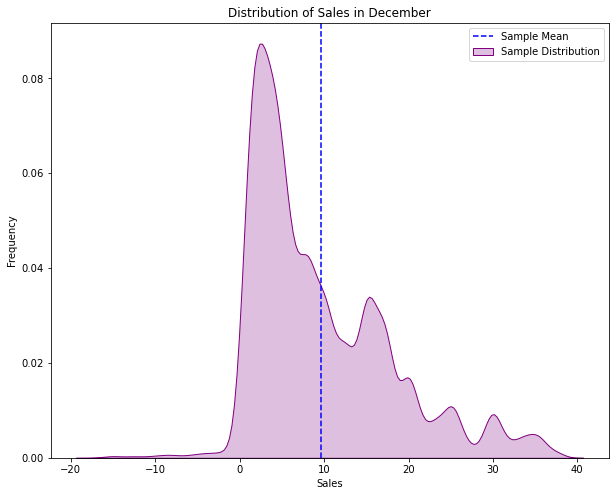

In [115]:
# plot distribution of dec sales
plt.figure(figsize=[10,8])
sb.kdeplot(sample_a, label='Sample Distribution', color='purple', shade=True)
plt.axvline(x = sample_a.mean(), color='blue', linestyle='--', label='Sample Mean')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales in December')
plt.legend()
plt.show();

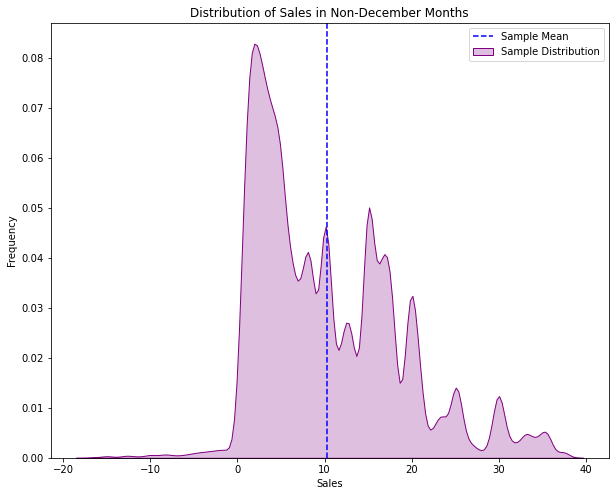

In [116]:
# plot distribution of no_dec sales
plt.figure(figsize=[10,8])
sb.kdeplot(sample_b, label='Sample Distribution', color='purple', shade=True)
plt.axvline(x = sample_b.mean(), color='blue', linestyle='--', label='Sample Mean')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales in Non-December Months')
plt.legend()
plt.show();

In [117]:
# perform 2-sample T-test on actual sample data
alpha=0.05
results_a = stats.ttest_ind(sample_a, sample_b)
print('p-value: ', results_a.pvalue)
if results_a.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-value:  3.6469133030384014e-72
We reject the null hypothesis


> **Based on the data, we reject the null hypothesis.**
>
> Based on the result of statistical test and excluding the outliers, we found out that there is a difference between the average sales generated in December and average sales in other months. This could also mean that the average sales in December can be higher than the average sales in other months or vice-versa.

<a id='conclusion'></a>
## Conclusion

### Project Goal
The project goal is to provide answers to the following:
#### **a. Identify the top performing products and product ranges or categories.**<br>

While performing exploratory analysis on the data, I identified the top performing products in terms of sales amount and these are:<br>
- 1. REGENCY CAKESTAND 3 TIER
- 2. WHITE HANGING HEART T-LIGHT HOLDER
- 3. PARTY BUNTING
- 4. JUMBO BAG RED RETROSPOT

And the top performing products based on quantity sold are:<br>
- 1. WORLD WAR 2 GLIDERS ASSTD DESIGNS
- 2. JUMBO BAG RED RETROSPOT.
- 3. ASSORTED COLOUR BIRD ORNAMENT
- 4. POPCORN HOLDER
- 5. PACK OF 72 RETROSPOT CAKE CASES
- 6. WHITE HANGING HEART T-LIGHT HOLDER
        
Based on product category analysis, the top performing product category in terms of both sales amount and quantity sold is:<br>
- Retrospot Items<br><br>

#### **b. Identify the top performing customers.**<br>

Based on total sales, the top 5 customers are:<br>
- 1. 14646
- 2. 18102
- 3. 17450
- 4. 14911
- 5. 12415

Based on total quantity purchased, the top 5 customers are:<br>
- 1. 14646
- 2. 12415
- 3. 14911
- 4. 17450
- 5. 18102

Noticeably, they are the same set of customers.

### Exporatory Data Analysis
- 1. Our dataset coverage is from 2018-11-29 to 2019-12-07. It is expected not to have high sales figures for 11-2018 and 12-2019 periods since these cover only a few days and not full month. Surprisingly, the sales figures for the period of 12-2018 is relatively low as compared to sales figures in 09-2019, 10-2019 and 11-2019. 11-2019 is the best month.<br><br>
- 2. When data is summarized per day of the week, it shows that most people purchase during Fridays and Wednesdays but never on a Sunday.<br><br>
- 3. In the correlation plot between unit price, quantity and sales, it shows that there is a positive but weak relationship between unit price and sales. It means that high-priced product don't necessarily result to higher sales amount or low-priced products don't necessarily result to lower sales amount.<br><br>
- 4. There is also a quite good relationship between quantity and sales. It suggests that larger quantities purchased can result to higher sales.<br><br>
- 5. There is a week negative relationship between unit price and quantity. It's like high-priced products are purchased lesser than the low-priced products.<br><br>

### Analysis on Returned Items / Cancellations
- 1. PAPER CRAFT, LITTLE BIRDIE has the highest amount of returns as well as the largest number of returns.<br><br>
- 2. While REGENCY CAKESTAND 3 TIER is the top performing product in terms of sales amount, it is also the most frequently returned product. It was returned 181 times throughout the year.<br><br>
- 3. Customer ID 16446 is our customer who has both the highest amount and quantity of product returns.<br><br>
- 4. Customer ID 14911 is the top customer who has frequently returned products. This customer has returned 222 times.<br><br>
- 5. Surprisingly, the period 12-2019 has the higest amount of returns considering that this period has only 7 days.<br><br>

### Customer Segmentation using RFM
- 1. Based on RFM scores, we have grouped the customers into the following segments:<br>
    - Top Customers
    - Active Customers
    - Average Customers
    - Customers at Risk
    - Inactive Customers <br><br>
    
- 2. The proportion of top and active customers to total number of customers is 38.93 %. The proportion of average customers to total number of customers is 20.83 %. The proportion of customers at risk and inactive customers to total number of customers is 40.24 % <br><br>

- 3. The combined proportion of top, active and average customers is almost 60%. This is not bad as 60% of the customer base are making their purchases in a manner that can sustain the online store business. <br><br>

- 4. However, the 40% requires attention from the business owner. These customers need to be reactivated and encouraged to make more purchases and frequently. <br><br>

- 5. Here are the recommendations I propose for each segment:<br><br>

        - **Inactive Customers** - Send them personalized emails containing discounted items to encourage them to order and be active.<br><br>

        - **Customers at Risk** - This group of customers need attention as they made some purchases but it's been a long time since their last purchase. Send them personalized emails as well containing promotional items or free samples of products to try to encourage them to be more active.<br><br>

        - **Average Customers** - This group of customers are not consistently inactive nor active. Send them emails with discounted or promo items for every occasion like their birthdays, mother's day, father's day, Christmas etc.<br><br>

        - **Active Customers** - Create loyalty rewards program for this group where they can earn point for every purchase and convert these points into discount or voucher.<br><br>

        - **Top Customers** - Send birthday and anniversary (as being customer) cards with discount vouchers. Create a referral program where they can get a discount upon the first purchase of their referrals.<br>

### Product Segmentation using RFM
- 1. Based on RFM and Kmeans clustering, we have grouped the products into the following clusters:<br><br>

- **Cluster 0** - is the worst-performing product group with average recency of 160 days, average frequency of 10 times and average sales of 167.


- **Cluster 1** - is the best-performing product group with average recency of 2.9 days, average frequency of 306 times, and average sales of 6,231.


- **Cluster 2** - is quite good and not bad with average recency of 15 days, average frequency of 58 times and average sales of 655.<br><br>

- 2. Here are my recommendations for each cluster:<br><br>

- **Cluster 0** - Review the products in this cluster, it probably needs to have more assortment or variety, current stocks are maybe in incomplete sizes or colors and maybe the products are out of season or outdated. Recency of 160 days is like more than 5 months since the last time the products were purchased. Frequency of only 10 times is like the products are being purchased not even once a month. Sales of 167 throughout the year is very low.


- **Cluster 1** - For Cluster 1 products, probably add more variety and increase the quantities. Monitor the inventories so these products won't go out of stock. Continue whatever the existing advertising or marketing campaigns for these products.


- **Cluster 2** - For Cluster 2, with recency of 15, it is good. It means the products are marketable or saleable currently. However, the frequency of 58 times is quite rare and sales of 655 is low, it's like the products are being purchased about 5 times a month. This can be increased by creating more advertising and promotional strategies to target specific customer demographics.


### Product Category Identification
Product categorization is important as the quality of product analysis depends heavily on the ability to accurately cluster similar products.
- 1. Text-preprocessing - I didn't have to perform lemmatization as I thought the words in the description don't need to be in their root words or stem words. I perform lowercasing all letters and removing stop words.<br><br>
- 2. Text vectorization algorithm - I used the NLP TF-IDF Vectorizer to transform text into vectors. <br><br>
- 3. Clustering - I used K-Means (Elbow method) to identify the number of clusters and to cluster the texts.<br><br>
- 4. I used WordCloud to identify the most important/common words in each cluster.<br><br>
- 5. Here are the category names created:
        - Cluster 0 - Retrospot Items
        - Cluster 1 - Tea light Holder and Decorations
        - Cluster 2 - Arts, Crafts and Gifts
        - Cluster 3 - Kitchen, Hardware and Storage
        - Cluster 4 - Signages
        - Cluster 5 - Pantry Items
        - Cluster 6 - Vintage Items
        - Cluster 7 - Bags
        - Cluster 8 - Food and Beverage Carriers

### Product Category Analysis
- 1. The top performing category based on quantity sold is Retrospot items which is almost 56% of the total quantity sold. The worst-performing is Food and Beverage Carriers category.<br><br>
- 2. Retrospot items is the product category that contribute significantly to total sales. More than half of the total sales (56%) are from Retrospot Items category. The worst-performing is Arts, Crafts and Gifts category.<br><br>
- 3. Retrospot Items is the leading category every month. Retrospot Items' highest sales is for the period of 11-2019.<br><br>
- 4. When daily average sales is computed by dividing monthly sales by 30 days, Retrospot Items remain consistently the highest sales generating every month.<br><br>
- 5. When monthly average sales is computed by dividing the total sales by 12 months, Retrospot Items has the highest average monthly sales and Arts, Craft and Gifts category has the lowest average monthly sales.<br><br>
- 6. Throughout the year, Retrospot Items remains the highest sales generating for all days of the week.<br><br>
- 7. Retrospot Items category has the largest variety of products with 2864 unique items.

### Statistical Hypotheses
- 1. ***High-priced products contribute to higher sales than the low-priced products.***
    - **Null Hypothesis:** There is no difference between the mean sales of low-priced products and high-priced products
    - **Alternative Hypothesis:** Mean sales of low-priced products is different than the mean sales of high-priced products
    - **Criteria for Decision:** alpha = 0.05
        - Accept null hypothesis if p-vaue is greater than alpha
        - Reject null hypothesis if p-value is less than alpha
    - **Based on the data, we reject the null hypothesis:**
        - Based on the result of statistical test and excluding the outliers, we found out that there is a difference between the average sales of low-priced products and average sales of high-priced products. Low price values are unit prices below 20 and high price values are unit prices 20 and above. This could also mean that the average sales of low-priced products can be higher than the average sales of high-priced products or vice-versa.<br><br>
        
- 2. ***Sales are higher during Christmas season (December) as compared to other months.***
    - **Null Hypothesis:** There is no difference between the average sales in December and the average sales in other months
    - **Alternative Hypothesis:** The average sales in December is different than the average sales in other months
    - **Criteria for Decision:** alpha = 0.05
        - Accept null hypothesis if p-vaue is greater than alpha
        - Reject null hypothesis if p-value is less than alpha
    - **Based on the data, we reject the null hypothesis:**
        - Based on the result of statistical test and excluding the outliers, we found out that there is a difference between the average sales generated in December and average sales in other months. This could also mean that the average sales in December can be higher than the average sales in other months or vice-versa.

## Limitations:
- 1. If I would be the future owner of the business or if I am the current owner of the business, I would be more interested on the profit analysis. The top performing products or top performing customers could be different based on profit. Profit is computed by subtracting the costs from the revenue. As the data doesn't have information about costs, the analysis is limited only on the unit price, quantity and sales amount.<br><br>
- 2. The dataset is only a year of sales transactions history. It would be better for comparison analysis if it is atleast 3 years sales transacton history. Like we can compare the performance of the store or the products every year.<br><br>
- 3. There is no information about the cancellation or return policy. The dataset has a significant number of cancellations/returns and it would be easier to understand how to manage those if there were additonal information.<br><br>
- 5. There is no information about the store's pricing policy. As I have observed, some stockcodes have multiple prices which I assume, it's either a price increase or a distinction between a wholesale price and retail price. Some prices are higher if there is no customer id. <br><br>
- 4. I wanted to use BERTopic or spacy but for some reason, I had issues with installing bertopic and spacy took a very long time to run and it caused my computer to freeze. I would probably explore more on other NLP or ML tools had I more computer resouces and longer time.

## Resources
- 1. To get ideas on how to perform product categorization<br>
        https://techblog.commercetools.com/boosting-product-categorization-with-machine-learning-ad4dbd30b0e8 <br><br>

- 2. How to deal with negative values in the logarithmic transformation to unskew the data<br>
        https://campus.datacamp.com/courses/customer-segmentation-in-python/data-pre-processing-for-clustering?ex=4 <br><br>

- 3. How to interpret the p-value of 0.0<br>
        https://www.statology.org/here-is-how-to-interpret-a-p-value-of-0-000/ <br><br>

- 4. How to find cancellation pairs<br>
        https://stackoverflow.com/questions/38831088/remove-cancelling-rows-from-pandas-dataframe <br><br>

- 5. To understand what is DOTCOM POSTAGE, DCGS (dotcomgiftshop) and Retrospot in the dataset<br>
        https://www.rexlondon.com/blog/dotcomgiftshop-changing-to-rex-london <br><br>

- 6. To decide whether to use or not to use lemmatization<br>
        https://www.datacamp.com/tutorial/stemming-lemmatization-python <br><br>

- 7. How to prepare data for hypothesis testing<br>
        https://towardsdatascience.com/hypothesis-testing-the-discount-bump-4b8b6b4c4fec<br><br>